# **DESAFÍO Nº6: REGRESIÓN LINEAL**
### **Módulo 4: Análisis Estadístico con Python**
#### *Carrera Data Science - G-93 - Desafio Latam*
#### Estudiante: Felipe Leal Arancibia

En este desafío validaremos nuestros conocimientos aprendidos de regresión lineal. Para lograrlo, necesitarás aplicar los modelos aprendidos en clase, utilizando de apoyo el archivo fish.csv.

Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.

Tiempo asociado: 2 horas cronológicas

## Descripción

#### Este conjunto de datos es un registro de las ventas en el mercado de 7 especies comunes de peces diferentes. Con este conjunto de datos, se busca realizar un modelo predictivo utilizando datos adecuados para máquinas y estimar el peso de los peces basándose en la longitud y ancho del pez.

#### El conjunto de datos incluye información sobre varias dimensiones del pez, que se utilizan para predecir su peso. Cada fila en el conjunto de datos representa una entrada de un pez individual y contiene varias columnas con información relevante. Las dimensiones del pez y otros atributos en el conjunto de datos podrían incluir:

##### - Species: La especie del pez.
##### - Weight: El peso del pez, que es la variable que se intenta predecir.
##### - Length1, Length2, Length3: Diferentes longitudes del pez.
##### - Height: Altura del pez.
##### - Width: Ancho del pez.


#### Los datos en este archivo permiten realizar análisis estadísticos y modelado predictivo para determinar cómo las dimensiones del pez están relacionadas con su peso. Esto puede ser útil en la industria pesquera y en la investigación científica para comprender mejor las relaciones entre las características físicas de los peces y su peso. Para esto se te solicita:

In [25]:
# Primero importar todas las potenciales librería sa utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
import statsmodels.api as sm


In [15]:
# Cargar los datos
df_peces = pd.read_csv('Fish.csv')
df_peces.shape

(159, 7)

In [16]:
df_peces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [17]:
# Ver y ordenar valores nulos
df_peces.apply(lambda x: sum(x.isnull()), axis=0).sort_values(ascending=False)

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

#### 1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr2, donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [20]:
# Crear una nueva columna 'Volume' asumiendo que el pez es un cilindro
df_peces['Volume'] = np.pi * (df_peces['Width'] / 2) ** 2 * df_peces['Height']
df_peces.tail(10)

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772,2.668939
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852,2.566265
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838,2.865779
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659,2.363581
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484,2.283319
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,3.188567
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,3.073402
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,2.820291
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,9.641848
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792,8.132601


#### 2. Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación al añadir el volumen? Explica.

           Weight   Length1   Length2   Length3    Height     Width    Volume
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507  0.881981
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050  0.732409
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547  0.741313
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520  0.767774
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881  0.868256
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000  0.905626
Volume   0.881981  0.732409  0.741313  0.767774  0.868256  0.905626  1.000000


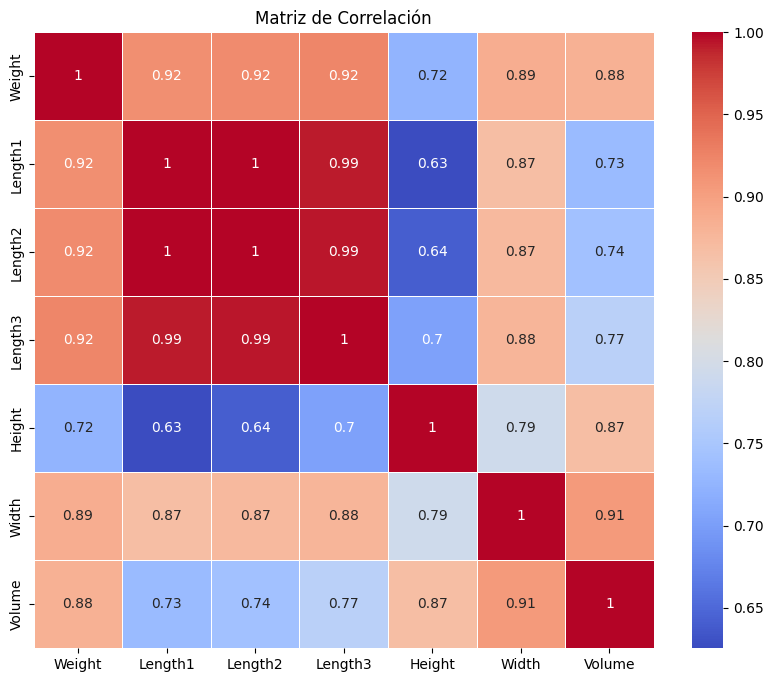

In [24]:
# Eliminar la columna 'Species' ya que es de tipo object
df_peces_numeric = df_peces.drop(columns=['Species'])

# Calcular la matriz de correlación
correlation_matrix = df_peces_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

#### 3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     549.9
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           3.65e-53
Time:                        16:33:10   Log-Likelihood:                -1040.5
No. Observations:                 159   AIC:                             2085.
Df Residuals:                     157   BIC:                             2091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7401     19.745      2.975      0.0

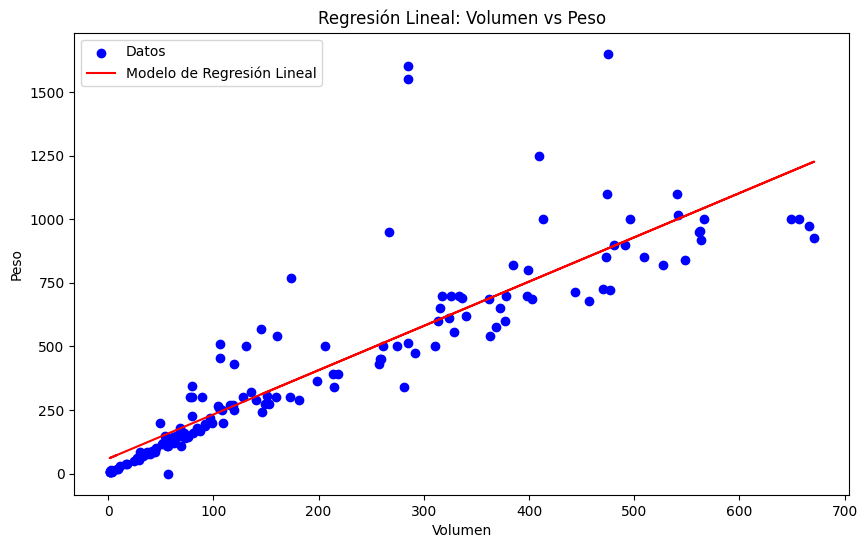

In [27]:
# Definir las variables dependiente e independiente
X = df_peces_numeric['Volume']
y = df_peces_numeric['Weight']

# Añadir una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(df_peces_numeric['Volume'], df_peces_numeric['Weight'], color='blue', label='Datos')
plt.plot(df_peces_numeric['Volume'], model.predict(X), color='red', label='Modelo de Regresión Lineal')
plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.title('Regresión Lineal: Volumen vs Peso')
plt.legend()
plt.show()

#### 4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.


Resumen del modelo para la especie Bream:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     289.7
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           6.65e-18
Time:                        16:34:46   Log-Likelihood:                -196.27
No. Observations:                  35   AIC:                             396.5
Df Residuals:                      33   BIC:                             399.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/home/hijodelpueblo/Escritorio/COMPUTIN 2022/DATA_SCIENCE/.env-datascience/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/hijodelpueblo/Escritorio/COMPUTIN 2022/DATA_SCIENCE/.env-datascience/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/hijodelpueblo/Escritorio/COMPUTIN 2022/DATA_SCIENCE/.env-datascience/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)
/home/hijodelpueblo/Escritorio/COMPUTIN 2022/DATA_SCIENCE/.env-datascience/lib/python3.10/s

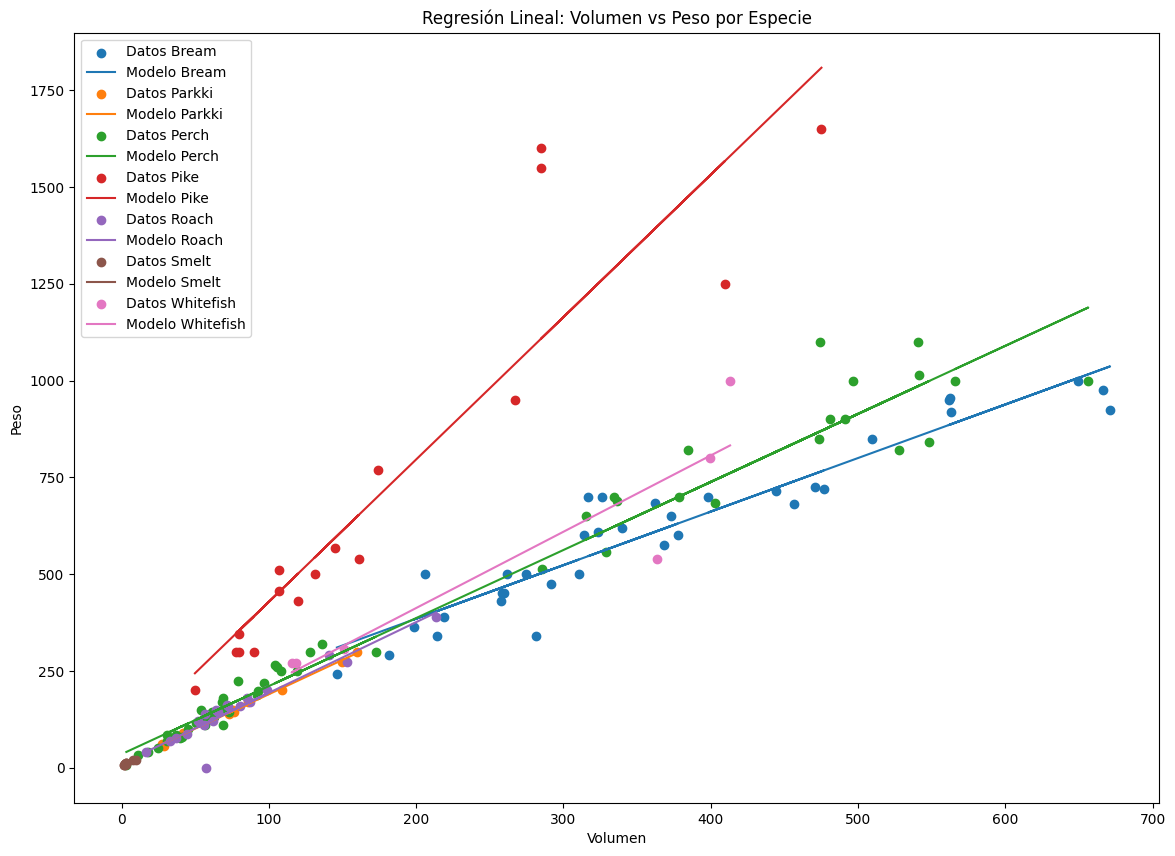

In [28]:
# Agrupar los datos por especie
grouped = df_peces.groupby('Species')

# Crear un diccionario para almacenar los modelos de regresión lineal por especie
models_by_species = {}

# Ajustar un modelo de regresión lineal para cada especie
for species, group in grouped:
    X_species = group['Volume']
    y_species = group['Weight']
    
    # Añadir una constante a la variable independiente
    X_species = sm.add_constant(X_species)
    
    # Ajustar el modelo de regresión lineal
    model_species = sm.OLS(y_species, X_species).fit()
    
    # Almacenar el modelo en el diccionario
    models_by_species[species] = model_species
    
    # Imprimir el resumen del modelo
    print(f"Resumen del modelo para la especie {species}:")
    print(model_species.summary())
    print("\n")

# Graficar los resultados para cada especie
plt.figure(figsize=(14, 10))
for species, group in grouped:
    plt.scatter(group['Volume'], group['Weight'], label=f'Datos {species}')
    plt.plot(group['Volume'], models_by_species[species].predict(sm.add_constant(group['Volume'])), label=f'Modelo {species}')

plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.title('Regresión Lineal: Volumen vs Peso por Especie')
plt.legend()
plt.show()


#### 5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     481.7
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           3.42e-96
Time:                        16:36:16   Log-Likelihood:                -921.89
No. Observations:                 159   AIC:                             1858.
Df Residuals:                     152   BIC:                             1879.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -170.5538     30.547     -5.583      0.0

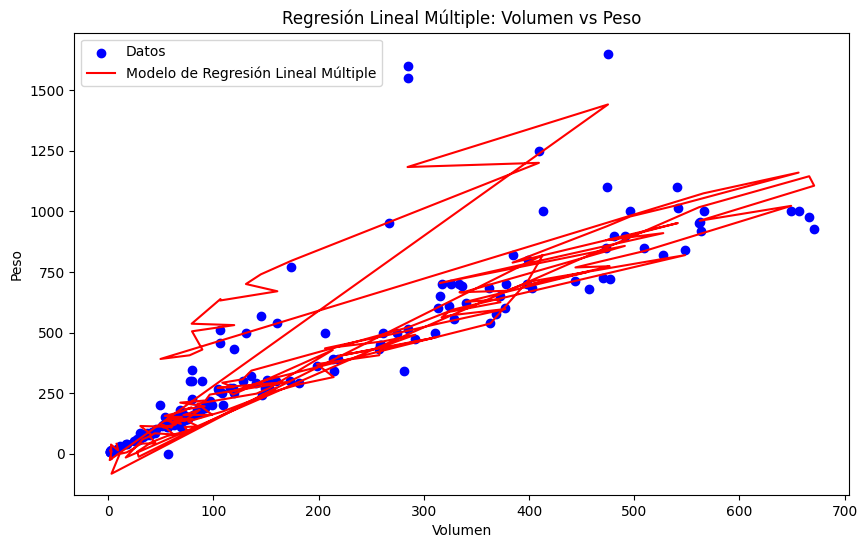

In [30]:
# Definir las variables dependiente e independientes
X_multi = df_peces_numeric[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volume']]
y_multi = df_peces_numeric['Weight']

# Añadir una constante a las variables independientes
X_multi = sm.add_constant(X_multi)

# Ajustar el modelo de regresión lineal múltiple
model_multi = sm.OLS(y_multi, X_multi).fit()

# Resumen del modelo
print(model_multi.summary())

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(df_peces_numeric['Volume'], df_peces_numeric['Weight'], color='blue', label='Datos')
plt.plot(df_peces_numeric['Volume'], model_multi.predict(X_multi), color='red', label='Modelo de Regresión Lineal Múltiple')
plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.title('Regresión Lineal Múltiple: Volumen vs Peso')
plt.legend()
plt.show()

-
-
-
___0_FiN__o___
-
-
-

### Requerimientos

1. Analiza correlaciones entre variables de un dataset, en forma numérica y gráfica. (2 Puntos)
2. Construye modelos de relación lineal en Python. (5 Puntos)
3. Evalúa modelos de regresión lineal. (3 Puntos)

¡Mucho éxito!

Consideraciones y recomendaciones

Considera que el pez es un cilindro por tanto el volumen de este será:
Volumen = Área de la base × Altura
Para un cilindro con una base circular, el área de la base (A) es igual a πr2, donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

Por lo tanto, la ecuación general para el volumen (V) de un cilindro es:

np.pi*df['Height']*(df['Width']/2)**2